### I. Download financial data of SaaS firms from AlphaVantage

In [1]:
# List of public SaaS firm
SaaS_tickers = ["ME","TWOU","EGHT","ACIW","ANSS","ACCD","ADBE","ADYYF","AFRM","API","ABNB","AKAM","ALRM","ALKT",
                "GOOGL","AYX","AMZN","AMWL","AMPL","PLAN","ANGI","APPF","APPN","AAPL","APP","ASAN","TEAM","ADSK",
                "ADP","AVLR","AVDX","AXON","BAND","BSY","BIGC","BILL","BKI","BB","BL","BLKB","BLND","APRN","BKNG",
                "BOX","BRZE","AI","LAW","CDAY","CHKP","CHGG","CHWY","CSCO","CWAN","CLDR","NET","COIN","CVLT","CFLT",
                "CNSWF","Wish","CSOD","BASE","COUP","CPNG","COUR","CRWD","CYBR","DDOG","DH","DHER","DM","DOCN","DCBO",
                "DOCU","DOMO","DASH","DOCS","DBX","DCT","DUOL","DT","EBAY","ESTC","ENV","ETSY","EB","EVCM","EVER","EVBG",
                "EXPE","EXFY","FFIV","FDS","FICO","FTCH","FSLY","FEYE","FIVN","FVRR","FLYW","FORG","FTNT","FRSH","GTLB",
                "GDDY","GDRX","GRAB","GRUB","GWRE","HCP","HCAT","HQY","HIMS","HUBS","CART","INST","INTA","INTU","IRNT",
                "JAMF","FROG","KVYO","LZ","LMND","LC","LSPD","LPSN","RAMP","LOGM","LYFT","MQ","MTCH","MTTR","MDLA","MELI",
                "META","MILE","MSTR","MSFT","MIME","MNTV","MNDY","MDB","NICE","NTCT","NFLX","NEWR","KIND","NUAN","NU",
                "NTNX","NVEI","NVDA","ONTF","OKTA","OLO","OTEX","OPEN","ORCL","OSCR","PRO","PTC","PGY","PD","PLTR",
                "PANW","PAYC","PCTY","PAY","PAYO","PYPL","PEGA","PTON","PING","PINS","PS","PWSC","PRVA","PCOR","PRGS",
                "PGNY","PFPT","QTWO","XM","QLYS","RCM","RPD","RP","RELY","RPAY","RNG","RSKD","HOOD","RBLX","SAP","SEMR",
                "SPSC","SAIL","CRM","IOT","SE","SCWX","S","NOW","FOUR","SHOP","SSTK","SKLZ","WORK","SMAR","SDC","SNAP",
                "SNOW","SOFI","SWI","SPLK","SPOT","CXM","SPT","SQ","SQSP","SFIX","STNE","SUMO","SNPS","TOST","TLND",
                "TALK","TDOC","TENB","TDC","REAL","TTD","TNET","TRIP","TRUE","TRUP","TURO","TWLO","TWTR","TYL","PATH",
                "UBER","UDMY","U","UPLD","UPST","UPWK","VRNS","VEEV","VRSN","VRNT","VRSK","VERX","VMW","WKME","WEAV",
                "WIX","WDAY","WK","YELP","YEXT","ZEN","ZD","ZG","ZI","ZM","ZS","ZUO","DLO","EHTH","NCNO"]

SaaS_names = ["23andME","2U","8x8","ACI Worldwide","ANSYS","Accolade","Adobe","Adyen","Affirm","Agora","Airbnb",
              "Akamai","Alarm.com","Alkami","Alphabet","Alteryx","Amazon","American Well Corp","Amplitude","Anaplan",
              "Angi Homeservices","AppFolio","Appian Corporation","Apple","Applovin Corporation","Asana",
              "Atlassian Corporation","Autodesk","Automatic Data Processing","Avalara","AvidXchange Holdings",
              "Axon Enterprise","Bandwidth","Bentley Systems","Big Commerce","Bill.com","Black Knight",
              "BlackBerry Limited","BlackLine","Blackbaud","Blend Labs","Blue Apron","Bookings","Box","Braze",
              "C3.ai","CS Disco","Ceridian HCM Holding","Check Point Software","Chegg","Chewy","Cisco Systems",
              "Clearwater Analytics Holdings, Inc.","Cloudera","Cloudflare","Coinbase","Commvault","Confluent",
              "Constellation Software","Context Logic","Cornerstone OnDemand","Couchbase","Coupa Software",
              "Coupang","Coursera","Crowdstrike","CyberArk Software","Datadog","Definitive Healthcare",
              "Delivery Hero","Desktop Metal","DigitalOcean","Docebo","DocuSign","Domo","DoorDash","Doximity",
              "Dropbox","Duck Creek Technologies","Duolingo","Dynatrace","Ebay","Elastic N.V.","Envestnet, Inc.",
              "Etsy","Eventbrite","EverCommerce","EverQuote","Everbridge","Expedia","Expensify","F5",
              "Factset Research Systems","Fair Isaac Corp","Farfetch Limited","Fastly","FireEye","Five9",
              "Fiverr","Flywire","ForgeRock","Fortinet","Freshworks","Gitlab","GoDaddy","GoodRx","Grab Holdings",
              "Grubhub","Guidewire Software","HashiCorp","Health Catalyst","HealthEquity","Hims & Hers Health",
              "HubSpot","Instacart","Instructure","Intapp","Intuit","IronNet","JAMF","JFrog","Klaviyo",
              "LegalZoom","Lemonade","Lending Club","Lightspeed POS","LivePerson","LiveRamp Holdings","LogMein",
              "Lyft","Marqeta","Match Group","Matterport","Medallia","MercadoLibre","Meta Platforms","Metromile",
              "MicroStrategy","Microsoft Corporation","Mimecast Limited","Momentive Global","Monday.com","MongoDB",
              "NICE","NetScout Systems","Netflix","New Relic","Nextdoor Holdings","Nuance","Nubank","Nutanix",
              "Nuvei","Nvidia","ON24","Okta","Olo","Open Text Corp","Opendoor Technologies","Oracle Corporation",
              "Oscar Health","PROS Holdings","PTC","Pagaya Technologies","PagerDuty","Palantir","Palo Alto Networks",
              "Paycom Software","Paylocity","Paymentus","Payoneer","Paypal","Pegasystems","Peloton","Ping Identity",
              "Pinterest","Pluralsight","PowerSchool","Privia Health Group","Procore","Progress Software","Progyny",
              "Proofpoint","Q2 Holdings","Qualtrics International","Qualys","R1 RCM","Rapid7","RealPage","Remitly Global",
              "Repay Holdings","Ringcentral","Riskified","Robinhood Markets","Roblox","SAP SE","SEMRush","SPS Commerce",
              "SailPoint Technologies","Salesforce.com","Samsara","Sea Limited","SecureWorks","SentinelOne","ServiceNow",
              "Shift4 Payments","Shopify","Shutterstock","Skillz","Slack","Smartsheet","Smile Direct Club","Snap",
              "Snowflake","SoFi","SolarWinds","Splunk","Spotify","Sprinklr","Sprout Social","Square","Squarespace",
              "Stitch Fix","StoneCo","Sumo Logic","Synopsys","TOAST","Talend S.A.","Talkspace","Teladoc",
              "Tenable Holdings","Teradata Corp","The RealReal","The Trade Desk","TriNet","TripAdvisor","TrueCar",
              "Trupanion","Turo","Twilio","Twitter","Tyler Technologies","UI Path","Uber Technologies","Udemy",
              "Unity Technologies","Upland Software","Upstart Holdings","Upwork","Varonis Systems","Veeva Systems",
              "VeriSign","Verint Systems","Verisk Analytics","Vertex","Vmware","WalkMe","Weave Communications",
              "Wix.com","Workday","Workiva","Yelp","Yext","Zendesk","Ziff Davis","Zillow","Zoom Info","Zoom Video",
              "Zscaler","Zuora","dLocal Limited","eHealth","nCino"]

In [2]:
# Check number of tickers
len(SaaS_tickers)

272

In [181]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [172]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
# Set the global display format for numbers with commas
pd.options.display.float_format = '{:,.0f}'.format

In [5]:
# API Key to access data fron alpha vantage
Eliza_API_key = 'L86W8WUL7D5IO7MW'

In [6]:
# Function to fetch financial data from Alpha Vantage for a list of tickers and store it in a DataFrame
def fetch_quarterly_financial_data(ticker_list, api_key, function='INCOME_STATEMENT'):
    
    # empty dictionary to save data
    consolidated_quarterly_dict = {}
    
    for ticker in ticker_list:
        try:
            # Construct the URL for the Alpha Vantage API request
            url = f'https://www.alphavantage.co/query?function={function}&symbol={ticker}&apikey={api_key}'
            
            # Make the API request
            response = requests.get(url)
            
            # Check if the request was successful (status code 200)
            if response.status_code == 200:
                data = response.json()
                
                # Extract the relevant financial data from the API response
                if 'quarterlyReports' in data.keys():
                    # put data in dataframe
                    quarterly_df = pd.DataFrame(data['quarterlyReports'])
                    
                    # Store the quarterly data in the dictionary with the ticker symbol as the key
                    consolidated_quarterly_dict[ticker] = quarterly_df
                
                else:
                    print(f"No quarterly data found for {ticker}.")
                    
            else:
                print(f"Failed to fetch data for {ticker}. Status code: {response.status_code}")
        
        except Exception as e:
            print(f"Error fetching data for {ticker}: {str(e)}")
            
    # return dictionary
    return consolidated_quarterly_dict

In [7]:
# Fetch financial data for the SaaS tickers
consolidated_quarterly_dict = fetch_quarterly_financial_data(SaaS_tickers, Eliza_API_key)

No quarterly data found for ADYYF.
No quarterly data found for PLAN.
No quarterly data found for AVLR.
No quarterly data found for BKI.
No quarterly data found for APRN.
No quarterly data found for CLDR.
No quarterly data found for CNSWF.
No quarterly data found for CSOD.
No quarterly data found for COUP.
No quarterly data found for DHER.
No quarterly data found for DCT.
No quarterly data found for FTCH.
No quarterly data found for FEYE.
No quarterly data found for FORG.
No quarterly data found for GRUB.
No quarterly data found for IRNT.
No quarterly data found for LOGM.
No quarterly data found for MDLA.
No quarterly data found for MILE.
No quarterly data found for MIME.
No quarterly data found for MNTV.
No quarterly data found for NEWR.
No quarterly data found for NUAN.
No quarterly data found for PING.
No quarterly data found for PS.
No quarterly data found for PFPT.
No quarterly data found for XM.
No quarterly data found for RP.
No quarterly data found for SAIL.
No quarterly data fo

In [18]:
# Look at the tickers with historical data extracted from Alpha Vantage
print(consolidated_quarterly_dict.keys())

num_key = len(consolidated_quarterly_dict.keys())
print(f'\nNumber of stocks extracted: {num_key}')

dict_keys(['ME', 'TWOU', 'EGHT', 'ACIW', 'ANSS', 'ACCD', 'ADBE', 'AFRM', 'API', 'ABNB', 'AKAM', 'ALRM', 'ALKT', 'GOOGL', 'AYX', 'AMZN', 'AMWL', 'AMPL', 'ANGI', 'APPF', 'APPN', 'AAPL', 'APP', 'ASAN', 'TEAM', 'ADSK', 'ADP', 'AVDX', 'AXON', 'BAND', 'BSY', 'BIGC', 'BILL', 'BB', 'BL', 'BLKB', 'BLND', 'BKNG', 'BOX', 'BRZE', 'AI', 'LAW', 'CDAY', 'CHKP', 'CHGG', 'CHWY', 'CSCO', 'CWAN', 'NET', 'COIN', 'CVLT', 'CFLT', 'Wish', 'BASE', 'CPNG', 'COUR', 'CRWD', 'CYBR', 'DDOG', 'DH', 'DM', 'DOCN', 'DCBO', 'DOCU', 'DOMO', 'DASH', 'DOCS', 'DBX', 'DUOL', 'DT', 'EBAY', 'ESTC', 'ENV', 'ETSY', 'EB', 'EVCM', 'EVER', 'EVBG', 'EXPE', 'EXFY', 'FFIV', 'FDS', 'FICO', 'FSLY', 'FIVN', 'FVRR', 'FLYW', 'FTNT', 'FRSH', 'GTLB', 'GDDY', 'GDRX', 'GRAB', 'GWRE', 'HCP', 'HCAT', 'HQY', 'HIMS', 'HUBS', 'CART', 'INST', 'INTA', 'INTU', 'JAMF', 'FROG', 'KVYO', 'LZ', 'LMND', 'LC', 'LSPD', 'LPSN', 'RAMP', 'LYFT', 'MQ', 'MTCH', 'MTTR', 'MELI', 'META', 'MSTR', 'MSFT', 'MNDY', 'MDB', 'NICE', 'NTCT', 'NFLX', 'KIND', 'NU', 'NTNX', 'N

**Observations**
- Some tickers are not extracted from Alpha Vantage because they are no longer actively traded in US equity market (got acquired, taken private) or simply that Alpha Vantage doesn't have financial data for them

### II. Process Data

In [364]:
# Copy extracted data to a new dictionary to perform data manipulation without the need to recall API
con_quarterly_dict = consolidated_quarterly_dict

In [365]:
# Function to convert all columns in a dataframe except some from exclusion list
def convert_columns_to_float_except(df, columns_to_exclude):
    # Create a dictionary to specify data types for each column
    data_types = {column: 'float' for column in df.columns if column not in columns_to_exclude}

    # Replace 'None' with 'NaN' in all columns using map
    df = df.apply(lambda col: col.map(lambda x: np.nan if x == 'None' else x))

    # Convert columns to 'float' using the astype method
    df = df.astype(data_types)
    
    return df

In [366]:
# Iterate through the dictionary and apply the function to each DataFrame
for ticker, quarterly_df in con_quarterly_dict.items():
    
    # Convert fiscal date ending to datetime
    quarterly_df['fiscalDateEnding'] = pd.to_datetime(quarterly_df['fiscalDateEnding'])

    # List of columns to exclude
    excluded_columns = ['fiscalDateEnding', 'reportedCurrency']
    
    # Run function to convert all columns to float type except those specified to be excluded above
    quarterly_df = convert_columns_to_float_except(quarterly_df, excluded_columns)

    # Add EBITDA Margin
    quarterly_df['EBITDA Margin %'] = quarterly_df['ebitda']/quarterly_df['totalRevenue'] * 100

    # Add Calendar Year col
    quarterly_df['Calendar Year'] = quarterly_df['fiscalDateEnding'].dt.year

    # Add Quarter col
    quarterly_df['Calendar Quarter'] = quarterly_df['fiscalDateEnding'].dt.quarter
   
    # Sort the DataFrame by 'fiscalDateEnding' in ascending order if it's not already sorted.
    quarterly_df.sort_values(by='fiscalDateEnding', inplace=True)

    # Calculate the sum of the last 4 quarters' revenue using rolling and sum
    quarterly_df['Last 4Q Revenue'] = quarterly_df['totalRevenue'].rolling(window=4).sum()
    
    # Convert to (mil) unit
    quarterly_df['Last 4Q Revenue (mil)'] = quarterly_df['Last 4Q Revenue'] / (10**6)
      
    # Calculate the sum of the last 4 quarters' EBITDA using rolling and sum
    quarterly_df['Last 4Q EBITDA'] = quarterly_df['ebitda'].rolling(window=4).sum()
    
    # Convert to (mil) unit
    quarterly_df['Last 4Q EBITDA (mil)'] = quarterly_df['Last 4Q EBITDA'] / (10**6)

    # Calculate the YoY revenue growth with a lag of 4 quarters
    quarterly_df['YoY Rolling 4Q Revenue Growth'] = quarterly_df['Last 4Q Revenue'].pct_change(periods=4, fill_method=None) * 100
    
    # Calculate last 4Q EBITDA Margin using Last 4Q EBITDA/Revenue - adjust for cases where Rev = 0
    quarterly_df['Rolling 4Q EBITDA Margin %'] = np.where(quarterly_df['Last 4Q Revenue'] == 0, np.nan,
                                                (quarterly_df['Last 4Q EBITDA'] / quarterly_df['Last 4Q Revenue']) * 100)
    
    # Calculate YoY revenue growth and EBITDA margin SUM
    quarterly_df['YoY Rev Growth + EBITDA Margin'] = (quarterly_df['YoY Rolling 4Q Revenue Growth'] + 
                                                                    quarterly_df['Rolling 4Q EBITDA Margin %'])
    
    # Calculate if metrics pass Rule of 40 and Rule of 50
    quarterly_df['Rule40_Pass'] = quarterly_df['YoY Rev Growth + EBITDA Margin'].apply(lambda x: True if x >= 40 else False)
    quarterly_df['Rule50_Pass'] = quarterly_df['YoY Rev Growth + EBITDA Margin'].apply(lambda x: True if x >= 50 else False)
   
    # Assign the modified quarterly_df back to the dictionary using the same key
    con_quarterly_dict[ticker] = quarterly_df

In [367]:
### Need to check if any extracted ticker only has NaN in 'Last 4Q Revenue'
# Create an empty list to store tickers with no valid numbers in 'Last 4Q Revenue'
tickers_with_missing_data = []

# Iterate through each ticker in the dictionary
for ticker, quarterly_df in con_quarterly_dict.items():
    # Check if there are any NaN values in the 'Last 4Q Revenue' column for this ticker
    if quarterly_df['Last 4Q Revenue'].isna().all():
        tickers_with_missing_data.append(ticker)

# Print the tickers with missing data
if tickers_with_missing_data:
    print("Tickers with missing data in 'Last 4Q Revenue':")
    for ticker in tickers_with_missing_data:
        print(ticker)
else:
    print("All tickers have valid data in 'Last 4Q Revenue'.")

All tickers have valid data in 'Last 4Q Revenue'.


In [368]:
### Drop all rows from tickers that only have NaN values in column 'Last 4Q Revenue'
# Drop rows for tickers with only NaN values in 'Last 4Q Revenue'
for ticker in tickers_with_missing_data:
    con_quarterly_dict.pop(ticker)

In [369]:
# preview a sample ticker
con_quarterly_dict['NFLX'].tail(20)

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,...,Calendar Quarter,Last 4Q Revenue,Last 4Q Revenue (mil),Last 4Q EBITDA,Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin,Rule40_Pass,Rule50_Pass
43,2019-03-31,USD,"1,650,378,000","4,520,992,000","2,870,614,000","2,870,614,000","459,084,000","818,530,000","372,764,000","1,766,010,000",...,1,"16,614,477,000","16,614","9,651,926,000","9,652",30,58,88,True,True
44,2019-06-30,USD,"1,917,459,000","4,923,116,000","3,005,657,000","3,005,657,000","706,419,000","827,807,000","383,233,000","1,818,930,000",...,2,"17,630,323,000","17,630","10,312,492,000","10,312",27,58,86,True,True
45,2019-09-30,USD,"2,146,986,000","5,244,905,000","3,097,919,000","3,097,919,000","980,239,000","786,971,000","379,776,000","1,779,697,000",...,3,"18,875,854,000","18,876","11,182,511,000","11,183",27,59,86,True,True
46,2019-12-31,USD,"2,001,411,000","5,467,434,000","3,466,023,000","3,466,023,000","458,512,000","3,012,523,000","537,227,000","1,754,194,000",...,4,"20,156,447,000","20,156","11,946,899,000","11,947",28,59,87,True,True
47,2020-03-31,USD,"2,167,990,000","5,767,691,000","3,599,701,000","3,599,701,000","958,256,000","755,917,000","453,817,000","1,209,734,000",...,1,"21,403,146,000","21,403","12,801,217,000","12,801",29,60,89,True,True
48,2020-06-30,USD,"2,504,579,000","6,148,286,000","3,643,707,000","3,643,707,000","1,357,928,000","711,606,000","435,045,000","1,146,651,000",...,2,"22,628,316,000","22,628","13,821,479,000","13,821",28,61,89,True,True
49,2020-09-30,USD,"2,567,886,000","6,435,637,000","3,867,751,000","3,867,751,000","1,314,863,000","799,221,000","453,802,000","1,253,023,000",...,3,"23,819,048,000","23,819","14,605,100,000","14,605",26,61,88,True,True
50,2020-12-31,USD,"2,479,282,000","6,644,442,000","4,165,160,000","4,165,160,000","954,242,000","2,485,104,000","486,936,000","3,126,440,000",...,4,"24,996,056,000","24,996","15,507,911,000","15,508",24,62,86,True,True
51,2021-03-31,USD,"3,294,771,000","7,163,282,000","3,868,511,000","3,868,511,000","1,959,856,000","809,708,000","525,207,000","1,334,915,000",...,1,"26,391,647,000","26,392","16,752,546,000","16,753",23,63,87,True,True
52,2021-06-30,USD,"3,323,769,000","7,341,777,000","4,018,008,000","4,018,008,000","1,847,630,000","938,818,000","537,321,000","1,476,139,000",...,2,"27,585,138,000","27,585","17,453,665,000","17,454",22,63,85,True,True


### III. Exploratory Data Analysis

### First, take a quick look at all data

In [370]:
# Convert the dictionary values into a single DataFrame
full_df = pd.concat(con_quarterly_dict.values(), keys=con_quarterly_dict.keys())

# Reset the index for a cleaner DataFrame
full_df.reset_index(level=0, inplace=True)
full_df.rename(columns={'level_0': 'Ticker'}, inplace=True)

# Display the resulting DataFrame
#display(full_df.info())

In [371]:
# Get a table for summary of statistics
statistics_summary_full = full_df[['Last 4Q Revenue (mil)', 'Last 4Q EBITDA (mil)', 'YoY Rolling 4Q Revenue Growth',
                                'Rolling 4Q EBITDA Margin %', 'YoY Rev Growth + EBITDA Margin']].describe()

# Display the statistical summary
display(statistics_summary_full)

,Last 4Q Revenue (mil),Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin
count,"6,853","6,756","5,916","6,752","5,857"
mean,"8,568",76,36,"-6,782","-7,674"
std,"36,850","79,603",505,"271,499","291,461"
min,0,"-3,413,059",-84,"-13,042,938","-13,042,774"
25%,326,-51,8,-14,13
50%,797,40,20,7,29
75%,"2,338",401,34,23,46
max,"550,716","130,634","31,708",261,"31,404"


**There seems to be some extreme values in column 'Last 4Q EBITDA (mil)', let's take a closer look**

In [372]:
# Get data row where min EBITDA occurs
min_ebitda_row = full_df[full_df['Last 4Q EBITDA (mil)'] == full_df['Last 4Q EBITDA (mil)'].min()]
min_ebitda_ticker = min_ebitda_row['Ticker'].values[0]

# List columns of interest
selected_columns = ['Ticker','fiscalDateEnding', 'Calendar Year', 'Calendar Quarter', 'totalRevenue', 'ebitda',
                    'Last 4Q Revenue (mil)', 'Last 4Q EBITDA (mil)', 
                    'YoY Rolling 4Q Revenue Growth', 'Rolling 4Q EBITDA Margin %', 
                    'YoY Rev Growth + EBITDA Margin', 'Rule40_Pass', 'Rule50_Pass']

# Extract data for unsual ticker
display(full_df[full_df['Ticker'] == min_ebitda_ticker][selected_columns].head(15))

,Ticker,fiscalDateEnding,Calendar Year,Calendar Quarter,totalRevenue,ebitda,Last 4Q Revenue (mil),Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin,Rule40_Pass,Rule50_Pass
0,LC,2010-06-30,2010,2,"95,158,000","-2,210,819,000",NaN,NaN,NaN,NaN,NaN,False,False
1,LC,2010-09-30,2010,3,"1,584,130","-2,665,120,000",NaN,NaN,NaN,NaN,NaN,False,False
2,LC,2010-12-31,2010,4,"1,587,987","-2,633,161,000",NaN,NaN,NaN,NaN,NaN,False,False
3,LC,2011-03-31,2011,1,"2,168,500","-10,303,328,000",100,"-17,812",NaN,"-17,724",NaN,False,False
4,LC,2011-06-30,2011,2,"2,785,526","-3,079,616,000",8,"-18,681",NaN,"-229,890",NaN,False,False
5,LC,2011-09-30,2011,3,"3,403,963","-3,312,845,000",10,"-19,329",NaN,"-194,339",NaN,False,False
6,LC,2011-12-31,2011,4,"4,393,867","-2,826,535,000",13,"-19,522",NaN,"-153,094",NaN,False,False
7,LC,2012-03-31,2012,1,"5,214,000","-2,837,025,000",16,"-12,056",-84,"-76,317","-76,401",False,False
8,LC,2012-06-30,2012,2,"6,663,000","-2,525,808,000,000",20,"-2,534,784",142,"-12,883,387","-12,883,244",False,False
9,LC,2012-09-30,2012,3,"9,897,000","-881,587,000,000",26,"-3,413,059",163,"-13,042,938","-13,042,774",False,False


**Observations:** something odd is going on with Lending Club data in earlier years 2010-2013, it started out with 95M revenue in June 2010 but then dropped to 1.6M in Sep 2010. Then EBITDA numbers in 2012 were ridiculous. This is likely a data collection error. Since the focus of this task is on period 2020-2023, too further back data can be ignored

### Now Focus on Data in 2020-2023

In [373]:
# List columns of interest
selected_columns = ['Ticker','fiscalDateEnding', 'Calendar Year', 'Calendar Quarter', 'Last 4Q Revenue (mil)', 
                    'Last 4Q EBITDA (mil)', 'YoY Rolling 4Q Revenue Growth', 'Rolling 4Q EBITDA Margin %', 
                    'YoY Rev Growth + EBITDA Margin', 'Rule40_Pass', 'Rule50_Pass']

# Extracted only related data for stocks in period 2020-2023
focused_df = full_df[full_df['Calendar Year'] >= 2020][selected_columns]

In [374]:
focused_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3479 entries, 0 to 10
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Ticker                          3479 non-null   object        
 1   fiscalDateEnding                3479 non-null   datetime64[ns]
 2   Calendar Year                   3479 non-null   int32         
 3   Calendar Quarter                3479 non-null   int32         
 4   Last 4Q Revenue (mil)           3238 non-null   float64       
 5   Last 4Q EBITDA (mil)            3239 non-null   float64       
 6   YoY Rolling 4Q Revenue Growth   2877 non-null   float64       
 7   Rolling 4Q EBITDA Margin %      3238 non-null   float64       
 8   YoY Rev Growth + EBITDA Margin  2877 non-null   float64       
 9   Rule40_Pass                     3479 non-null   bool          
 10  Rule50_Pass                     3479 non-null   bool          
dtypes: bool(2),

In [375]:
focused_df

,Ticker,fiscalDateEnding,Calendar Year,Calendar Quarter,Last 4Q Revenue (mil),Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin,Rule40_Pass,Rule50_Pass
0,ME,2020-06-30,2020,2,NaN,NaN,NaN,NaN,NaN,False,False
1,ME,2020-09-30,2020,3,NaN,NaN,NaN,NaN,NaN,False,False
2,ME,2020-12-31,2020,4,NaN,NaN,NaN,NaN,NaN,False,False
3,ME,2021-03-31,2021,1,244,-103,NaN,-42,NaN,False,False
4,ME,2021-06-30,2021,2,255,-108,NaN,-43,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6,NCNO,2022-10-31,2022,4,352,-67,NaN,-19,NaN,False,False
7,NCNO,2023-01-31,2023,1,408,-68,70,-17,54,True,True
8,NCNO,2023-04-30,2023,2,428,-47,59,-11,48,True,False
9,NCNO,2023-07-31,2023,3,445,-34,48,-8,40,False,False


In [376]:
# Check for infinite values in 'YoY Rev Growth + EBITDA Margin' column
is_inf = np.isinf(focused_df['YoY Rev Growth + EBITDA Margin'])

# Replace infinite values with NaN
focused_df.loc[is_inf, 'YoY Rev Growth + EBITDA Margin'] = np.nan

# Check for infinite values in 'YoY Rev Growth + EBITDA Margin' column
print(focused_df[is_inf])

Empty DataFrame
Columns: [Ticker, fiscalDateEnding, Calendar Year, Calendar Quarter, Last 4Q Revenue (mil), Last 4Q EBITDA (mil), YoY Rolling 4Q Revenue Growth, Rolling 4Q EBITDA Margin %, YoY Rev Growth + EBITDA Margin, Rule40_Pass, Rule50_Pass]
Index: []


### 1. Statistical Summary for main metrics of interests

In [377]:
# Get a table for summary of statistics
statistics_summary = focused_df[['Last 4Q Revenue (mil)', 'Last 4Q EBITDA (mil)', 'YoY Rolling 4Q Revenue Growth',
                                'Rolling 4Q EBITDA Margin %', 'YoY Rev Growth + EBITDA Margin']].describe()

# Display the statistical summary
display(statistics_summary)

,Last 4Q Revenue (mil),Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin
count,"3,238","3,239","2,877","3,238","2,877"
mean,"9,164","1,993",51,-16,44
std,"44,502","11,546",723,396,719
min,0,"-13,394",-73,"-22,254","-1,442"
25%,397,-119,9,-24,4
50%,831,-15,21,-3,24
75%,"2,375",231,37,17,43
max,"550,716","130,634","31,708",173,"31,404"


**Observations**
- Number of entries in column "YoY Rolling 4Q Revenue Growth" is less than total rows due missing data in prior 3 quarters, often occurring at initial phases of data initiation
- There are wide ranges of Revenue and EBITDA, indicating that data emcompasses companies of all sizes
- Median value for Revenue Growth of 21% is less than half of its Mean value of 51%, indicating that there are significantly higher revenue firms (like Apple, Google, Amazon) skewing the average to the up side
- Median value for EBITDA Margin of -3% is more positive than its Mean value fo -16%, indicating that there are firms with significantly negative EBITDA Margin skewing the average to the down side
- Median value for Revenue Growth + EBITDA Margin of 24% is much lower than its Mean value of 44%, indicating that there are firms with significantly higher (Revenue Growth + EBITDA Margin) performance skewing the average upward
- Data points in the top quartile (75pctl) have (Revenue Growth + EBITDA Margin) exceeding 40%, meaning that these data points made it to the **"Rule of 40" Club**


**Compare to full dataset:**
- Last 4Q Revenue (mil) and Revenue Growth are somewhat the similar/stable
- Last 4Q EBITDA (mil) and EBITDA Margin change quite a bit after incorrect historical data are removed

**Let's quickly look at ticker where Min of Last 4Q EBITDA (mil) occurs to see if there is any data issue**

In [378]:
# Get data row where min EBITDA occurs
min_ebitda_row = focused_df[focused_df['Last 4Q EBITDA (mil)'] == focused_df['Last 4Q EBITDA (mil)'].min()]
min_ebitda_ticker = min_ebitda_row['Ticker'].values[0]

# List columns of interest
selected_columns = ['Ticker','fiscalDateEnding', 'Calendar Year', 'Calendar Quarter',
                    'Last 4Q Revenue (mil)', 'Last 4Q EBITDA (mil)', 
                    'YoY Rolling 4Q Revenue Growth', 'Rolling 4Q EBITDA Margin %', 
                    'YoY Rev Growth + EBITDA Margin', 'Rule40_Pass', 'Rule50_Pass']

# Extract data for unsual ticker
display(focused_df[focused_df['Ticker'] == min_ebitda_ticker][selected_columns].head(15))

,Ticker,fiscalDateEnding,Calendar Year,Calendar Quarter,Last 4Q Revenue (mil),Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin,Rule40_Pass,Rule50_Pass
23,TDOC,2020-03-31,2020,1,574,-40,27,-7,21,False,False
24,TDOC,2020-06-30,2020,2,671,-25,40,-4,36,False,False
25,TDOC,2020-09-30,2020,3,811,-21,63,-3,60,True,True
26,TDOC,2020-12-31,2020,4,"1,094",-437,109,-40,69,True,True
27,TDOC,2021-03-31,2021,1,"1,343",-462,134,-34,100,True,True
28,TDOC,2021-06-30,2021,2,"1,574",-492,135,-31,103,True,True
29,TDOC,2021-09-30,2021,3,"1,805",-494,123,-27,95,True,True
30,TDOC,2021-12-31,2021,4,"2,027",-61,85,-3,82,True,True
31,TDOC,2022-03-31,2022,1,"2,172","-6,635",62,-305,-244,False,False
32,TDOC,2022-06-30,2022,2,"2,309","-9,645",47,-418,-371,False,False


**Observations:** TelaDoc has an Unsual Expense of 13B in calendar year 2022 (non-cash goodwell impairment charges) so the data seems to be correct here and the extreme values in distribution comes from unusual business activities

### 2. Now let's visualize the distribution of these main metrics

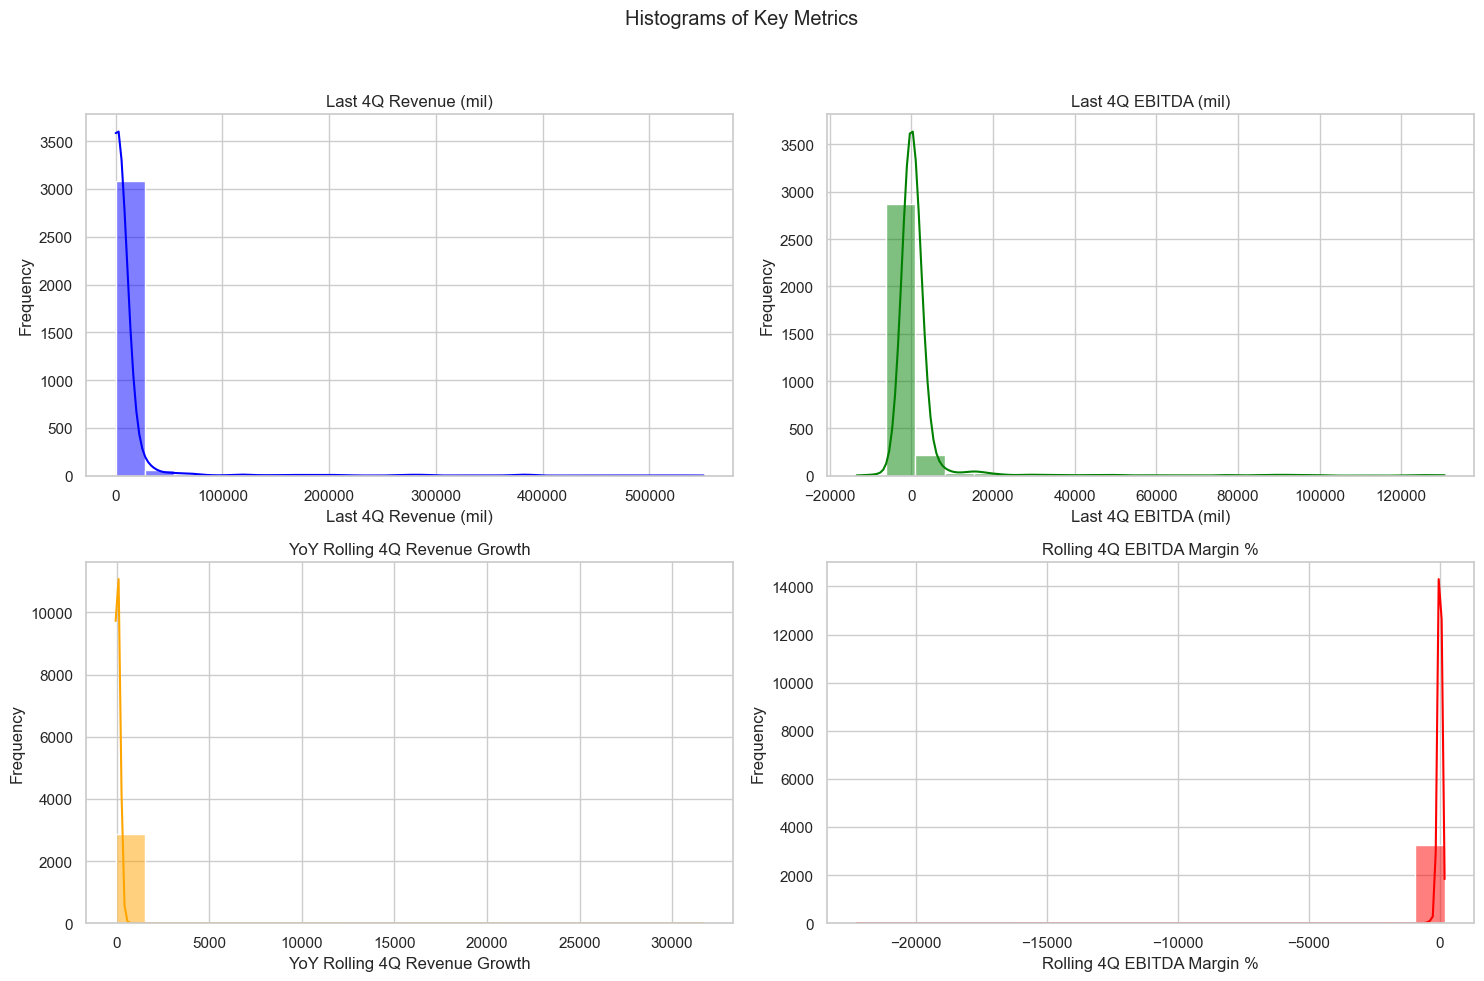

In [379]:
# Reset the index of the DataFrame
#focused_df_reset = focused_df.reset_index(drop=True)

# Set the style to use Seaborn's style
sns.set(style="whitegrid")

# Create subplots for the histograms
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Histograms of Key Metrics')

# Plot the histogram for 'Last 4Q Revenue (mil)'
sns.histplot(data=focused_df_reset, x='Last 4Q Revenue (mil)', bins=20, kde=True, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Last 4Q Revenue (mil)')
axs[0, 0].set_xlabel('Last 4Q Revenue (mil)')
axs[0, 0].set_ylabel('Frequency')

# Plot the histogram for 'Last 4Q EBITDA (mil)'
sns.histplot(data=focused_df_reset, x='Last 4Q EBITDA (mil)', bins=20, kde=True, color='green', ax=axs[0, 1])
axs[0, 1].set_title('Last 4Q EBITDA (mil)')
axs[0, 1].set_xlabel('Last 4Q EBITDA (mil)')
axs[0, 1].set_ylabel('Frequency')

# Plot the histogram for 'YoY Rolling 4Q Revenue Growth'
sns.histplot(data=focused_df_reset, x='YoY Rolling 4Q Revenue Growth', bins=20, kde=True, color='orange', ax=axs[1, 0])
axs[1, 0].set_title('YoY Rolling 4Q Revenue Growth')
axs[1, 0].set_xlabel('YoY Rolling 4Q Revenue Growth')
axs[1, 0].set_ylabel('Frequency')

# Plot the histogram for 'Rolling 4Q EBITDA Margin %'
sns.histplot(data=focused_df_reset, x='Rolling 4Q EBITDA Margin %', bins=20, kde=True, color='red', ax=axs[1, 1])
axs[1, 1].set_title('Rolling 4Q EBITDA Margin %')
axs[1, 1].set_xlabel('Rolling 4Q EBITDA Margin %')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the histograms
plt.show()

**Observation:** There are outliers in the upper end of Revenue Growth and in the lower end of EBITDA Marign skewing the histograms of the 2 metrics and their SUM. Two main reasons (specific examples in analysis by Calendar Year below)
- When revenue first takes off, low demoninators makes YoY growth % astronomically high
- When companies starts, revenue is minimal but EBITDA is significantly larger (initial investments into R&D and Operation), making negative numerator (vs small denominator)

**Let's cut off the upper and lower 1% data points to see the distribution better**

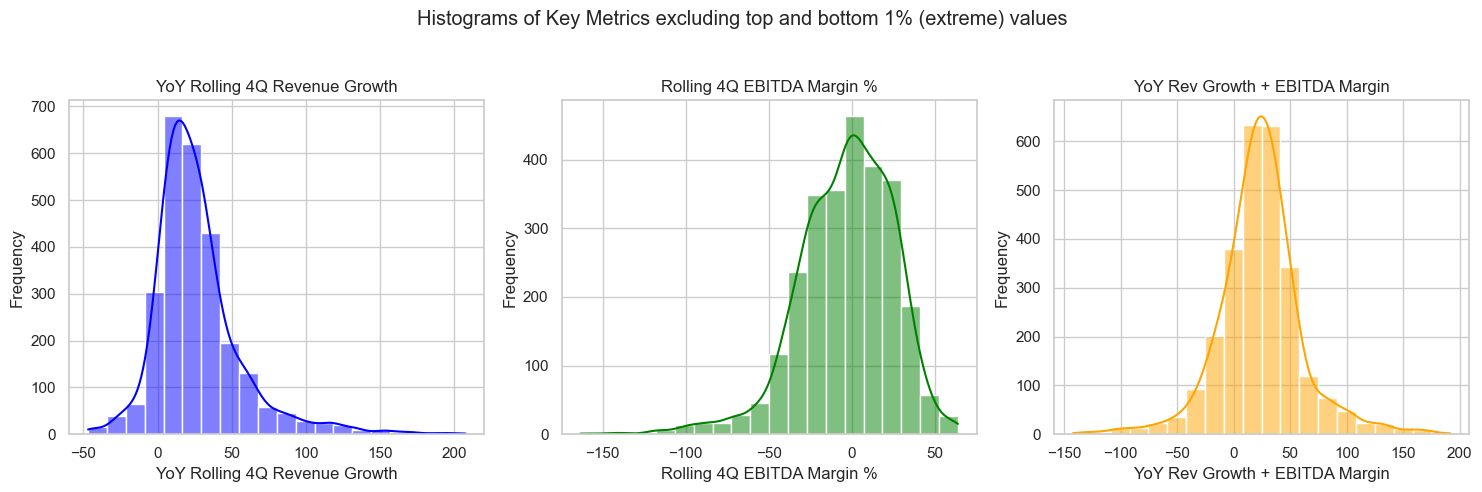

In [380]:
# Only focus on a few main metrics
focused_df_main_metrics = focused_df[['Last 4Q Revenue (mil)', 'Last 4Q EBITDA (mil)', 'YoY Rolling 4Q Revenue Growth',
                                        'Rolling 4Q EBITDA Margin %', 'YoY Rev Growth + EBITDA Margin']]

# Create subplots for the histograms
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Histograms of Key Metrics excluding top and bottom 1% (extreme) values')

# Define the lower and upper percentiles to cut off (1% from each end)
lower_percentile = 1
upper_percentile = 99

# Calculate the lower and upper cutoff values for each column
lower_cutoff = focused_df_main_metrics.quantile(lower_percentile / 100)
upper_cutoff = focused_df_main_metrics.quantile(upper_percentile / 100)

# Filter the DataFrame to remove values below the lower cutoff and above the upper cutoff
filtered_df = focused_df_main_metrics[(focused_df_main_metrics >= lower_cutoff) & (focused_df_main_metrics <= upper_cutoff)].dropna()

# Plot the histogram for 'YoY Rolling 4Q Revenue Growth'
sns.histplot(data=filtered_df, x='YoY Rolling 4Q Revenue Growth', bins=20, kde=True, color='blue', ax=axs[0])
axs[0].set_title('YoY Rolling 4Q Revenue Growth')
axs[0].set_xlabel('YoY Rolling 4Q Revenue Growth')
axs[0].set_ylabel('Frequency')

# Plot the histogram for 'Rolling 4Q EBITDA Margin %'
sns.histplot(data=filtered_df, x='Rolling 4Q EBITDA Margin %', bins=20, kde=True, color='green', ax=axs[1])
axs[1].set_title('Rolling 4Q EBITDA Margin %')
axs[1].set_xlabel('Rolling 4Q EBITDA Margin %')
axs[1].set_ylabel('Frequency')

# Calculate 'YoY Rev Growth + EBITDA Margin'
filtered_df['YoY Rev Growth + EBITDA Margin'] = filtered_df['YoY Rolling 4Q Revenue Growth'] + filtered_df['Rolling 4Q EBITDA Margin %']

# Plot the histogram for 'YoY Rev Growth + EBITDA Margin'
sns.histplot(data=filtered_df, x='YoY Rev Growth + EBITDA Margin', bins=20, kde=True, color='orange', ax=axs[2])
axs[2].set_title('YoY Rev Growth + EBITDA Margin')
axs[2].set_xlabel('YoY Rev Growth + EBITDA Margin')
axs[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the histograms
plt.show()

**Observations:** Distribution makes more sense here
- Revenue Growth is right-skewed, peaking between 10% and 20%
- EBITDA Margin is left-skewed, peaking between 0% and 5%
- Revenue Growth + EBITDA Margin seems more bell-shaped, peaking at round 20%

### 3. Distribution of YoY Rev Growth + EBITDA Margin By Calendar Year

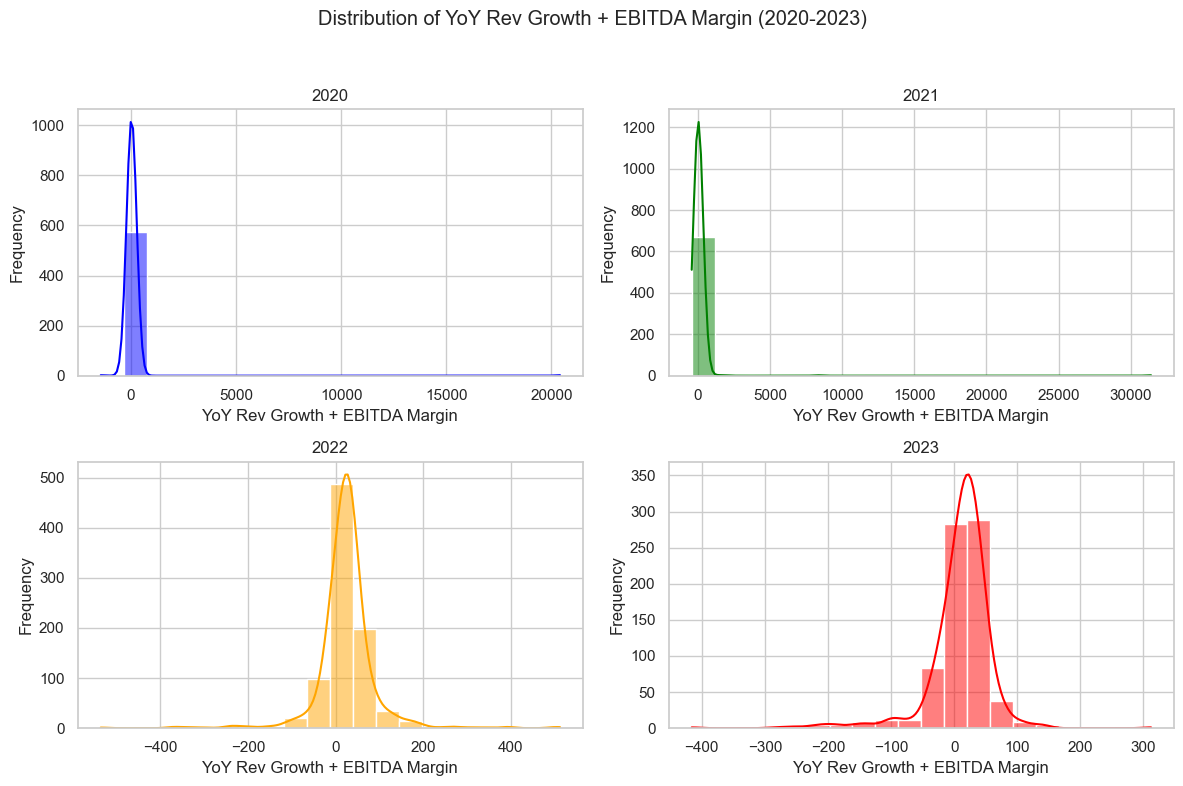

In [381]:
# Set the style to use Seaborn's style
#sns.set(style="whitegrid")

# Filter data for each year
data_2020 = focused_df[focused_df['Calendar Year'] == 2020]['YoY Rev Growth + EBITDA Margin']
data_2021 = focused_df[focused_df['Calendar Year'] == 2021]['YoY Rev Growth + EBITDA Margin']
data_2022 = focused_df[focused_df['Calendar Year'] == 2022]['YoY Rev Growth + EBITDA Margin']
data_2023 = focused_df[focused_df['Calendar Year'] == 2023]['YoY Rev Growth + EBITDA Margin']

# Create subplots for each year
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of YoY Rev Growth + EBITDA Margin (2020-2023)')

# Plot histograms using Seaborn
sns.histplot(data=data_2020, bins=20, kde=True, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('2020')
axs[0, 0].set_xlabel('YoY Rev Growth + EBITDA Margin')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(data=data_2021, bins=20, kde=True, color='green', ax=axs[0, 1])
axs[0, 1].set_title('2021')
axs[0, 1].set_xlabel('YoY Rev Growth + EBITDA Margin')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(data=data_2022, bins=20, kde=True, color='orange', ax=axs[1, 0])
axs[1, 0].set_title('2022')
axs[1, 0].set_xlabel('YoY Rev Growth + EBITDA Margin')
axs[1, 0].set_ylabel('Frequency')

sns.histplot(data=data_2023, bins=20, kde=True, color='red', ax=axs[1, 1])
axs[1, 1].set_title('2023')
axs[1, 1].set_xlabel('YoY Rev Growth + EBITDA Margin')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the histograms
plt.show()

**Observations**:
- It looks like outliers mostly show up in 2020-2021 charts, on the higher ends, making the first 2 histograms right-skewed

**Let's look at those outliers and temporarily remove them**

In [382]:
outlier_df = focused_df[focused_df['YoY Rev Growth + EBITDA Margin'] > 400]
display(outlier_df)

,Ticker,fiscalDateEnding,Calendar Year,Calendar Quarter,Last 4Q Revenue (mil),Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin,Rule40_Pass,Rule50_Pass
7,COIN,2021-12-31,2021,4,"7,839","3,101",514,40,553,True,True
8,DM,2020-12-31,2020,4,21,-34,"20,572",-163,"20,409",True,True
9,DM,2021-03-31,2021,1,32,-97,"31,708",-304,"31,404",True,True
10,DM,2021-06-30,2021,2,49,-116,"2,071",-240,"1,832",True,True
11,DM,2021-09-30,2021,3,72,-160,"1,434",-224,"1,210",True,True
7,CART,2021-12-31,2021,4,"1,836",-39,"8,367",-2,"8,365",True,True
8,OPEN,2022-03-31,2022,1,"12,425",-157,499,-1,498,True,True
9,OPEN,2022-06-30,2022,2,"15,437",9,513,0,513,True,True
7,PGY,2021-12-31,2021,4,476,-23,419,-5,414,True,True


In [383]:
focused_df[focused_df['Ticker'] == 'DM']

,Ticker,fiscalDateEnding,Calendar Year,Calendar Quarter,Last 4Q Revenue (mil),Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin,Rule40_Pass,Rule50_Pass
5,DM,2020-03-31,2020,1,0,-22,NaN,"-22,254",NaN,False,False
6,DM,2020-06-30,2020,2,2,-46,NaN,"-2,048",NaN,False,False
7,DM,2020-09-30,2020,3,5,-65,-47,"-1,396","-1,442",False,False
8,DM,2020-12-31,2020,4,21,-34,"20,572",-163,"20,409",True,True
9,DM,2021-03-31,2021,1,32,-97,"31,708",-304,"31,404",True,True
10,DM,2021-06-30,2021,2,49,-116,"2,071",-240,"1,832",True,True
11,DM,2021-09-30,2021,3,72,-160,"1,434",-224,"1,210",True,True
12,DM,2021-12-31,2021,4,112,-252,441,-226,216,True,True
13,DM,2022-03-31,2022,1,144,-229,354,-159,196,True,True
14,DM,2022-06-30,2022,2,187,-473,285,-253,31,False,False


**Obervations:**
- We can see that these cases of extremely high YoY Revenue Growth is due to company's initial revenue lift from less than 1M to double digit xxM, which is just the impact of a small denominator

- Similarly, cases of very negative EBITDA Margin are start-up phases where revenue is minimal but there are expeneses to run operations, which produces negative denominator and very small denominator

**Let's remove extreme values for these tickers to see if histograms shapes of each year resemble one another**

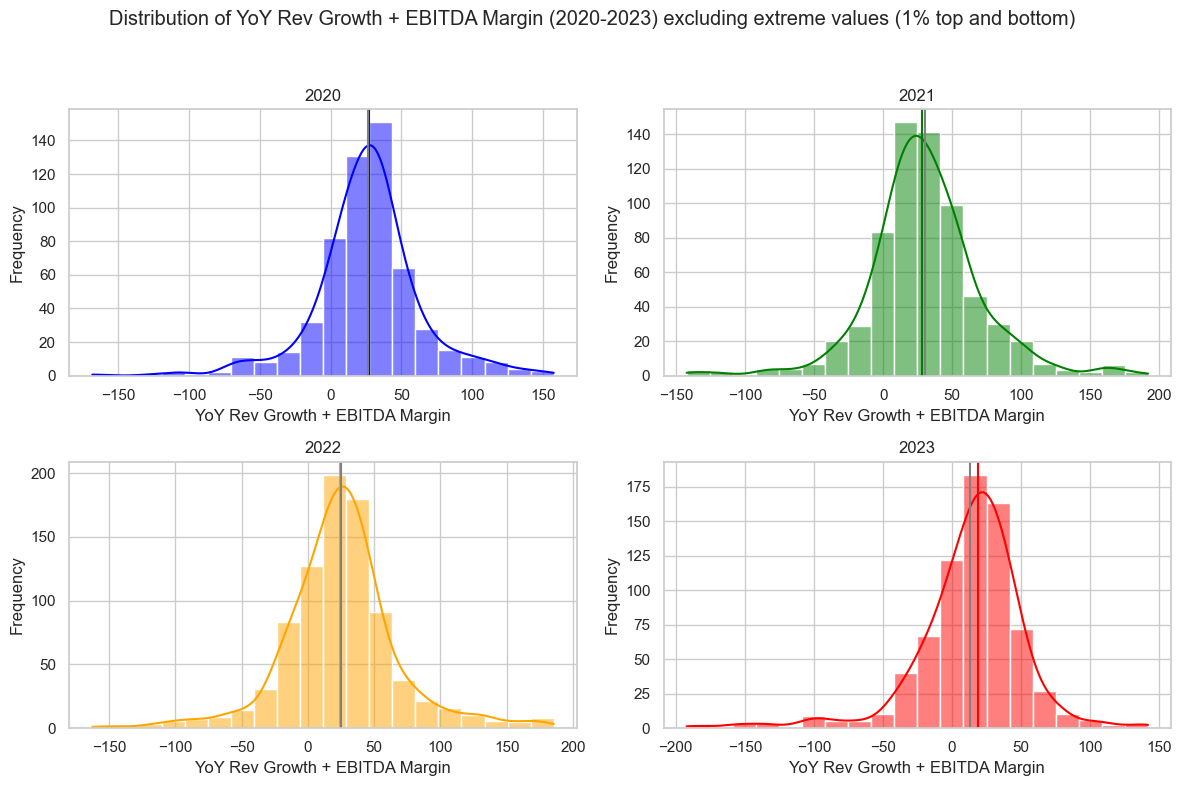

In [384]:
# Calculate the top 1% and bottom 1% quantiles
top_quantile = focused_df['YoY Rev Growth + EBITDA Margin'].quantile(0.99)
bottom_quantile = focused_df['YoY Rev Growth + EBITDA Margin'].quantile(0.01)

# Exclude top and bottom values from this analysis
no_outlier_df = focused_df[(focused_df['YoY Rev Growth + EBITDA Margin'] < top_quantile ) &
                           (focused_df['YoY Rev Growth + EBITDA Margin'] > bottom_quantile)]

# Filter data for each year
data_2020 = no_outlier_df[no_outlier_df['Calendar Year'] == 2020]['YoY Rev Growth + EBITDA Margin']
data_2021 = no_outlier_df[no_outlier_df['Calendar Year'] == 2021]['YoY Rev Growth + EBITDA Margin']
data_2022 = no_outlier_df[no_outlier_df['Calendar Year'] == 2022]['YoY Rev Growth + EBITDA Margin']
data_2023 = no_outlier_df[no_outlier_df['Calendar Year'] == 2023]['YoY Rev Growth + EBITDA Margin']

# Create subplots for each year
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of YoY Rev Growth + EBITDA Margin (2020-2023) excluding extreme values (1% top and bottom)')

# Plot histograms using Seaborn
sns.histplot(data=data_2020, bins=20, kde=True, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('2020')
axs[0, 0].set_xlabel('YoY Rev Growth + EBITDA Margin')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(data=data_2021, bins=20, kde=True, color='green', ax=axs[0, 1])
axs[0, 1].set_title('2021')
axs[0, 1].set_xlabel('YoY Rev Growth + EBITDA Margin')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(data=data_2022, bins=20, kde=True, color='orange', ax=axs[1, 0])
axs[1, 0].set_title('2022')
axs[1, 0].set_xlabel('YoY Rev Growth + EBITDA Margin')
axs[1, 0].set_ylabel('Frequency')

sns.histplot(data=data_2023, bins=20, kde=True, color='red', ax=axs[1, 1])
axs[1, 1].set_title('2023')
axs[1, 1].set_xlabel('YoY Rev Growth + EBITDA Margin')
axs[1, 1].set_ylabel('Frequency')

# Calculate median for each year's data
median_2020 = data_2020.median()
median_2021 = data_2021.median()
median_2022 = data_2022.median()
median_2023 = data_2023.median()

# Calculate mean for each year's data
mean_2020 = data_2020.mean()
mean_2021 = data_2021.mean()
mean_2022 = data_2022.mean()
mean_2023 = data_2023.mean()

# Add vertical lines for median and mean
axs[0, 0].axvline(median_2020, color='blue', label=f'Median: {median_2020:.2f}')
axs[0, 0].axvline(mean_2020, color='grey', label=f'Mean: {mean_2020:.2f}')

axs[0, 1].axvline(median_2021, color='green', label=f'Median: {median_2021:.2f}')
axs[0, 1].axvline(mean_2021, color='grey',  label=f'Mean: {mean_2021:.2f}')

axs[1, 0].axvline(median_2022, color='orange', label=f'Median: {median_2022:.2f}')
axs[1, 0].axvline(mean_2022, color='grey', label=f'Mean: {mean_2022:.2f}')

axs[1, 1].axvline(median_2023, color='red', label=f'Median: {median_2023:.2f}')
axs[1, 1].axvline(mean_2023, color='grey', label=f'Mean: {mean_2023:.2f}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the histograms
plt.show()

**Observations:** Now histograms in each year resemble each other more and in general show the bell shapes of data in all years combined

### 4. Distribution chart of Rev Growth + EBITDA Margin by Calendar Year and Quarter

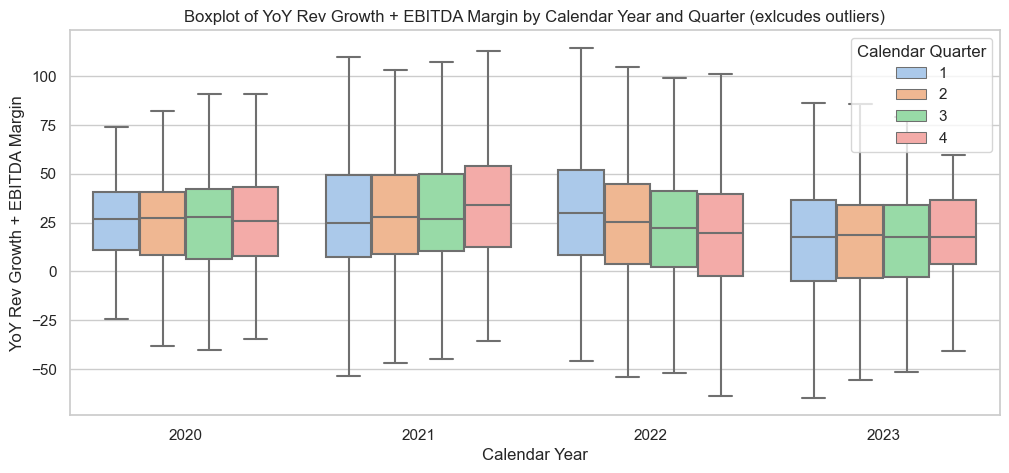

In [385]:
# Set the size of the chart
plt.figure(figsize=(12, 5))

# Create the boxplot with a larger size and custom palette
sns.boxplot(data=focused_df, x='Calendar Year', y='YoY Rev Growth + EBITDA Margin', 
            hue='Calendar Quarter', showfliers=False, palette="pastel")

# Add a title
plt.title('Boxplot of YoY Rev Growth + EBITDA Margin by Calendar Year and Quarter (exlcudes outliers)')

# Show the plot
plt.show()

**Observation:** As noted above, median value for (Rev Growth + EBITDA Margin) is around 25%. 2021 and 2022 seem to have more variations in IQR than 2020 and 2023 (some companies haven't reported Q4 2023 result as of the time of this analysis)

### IV. Analytics and Vizualization: Focus on 2020-2023 period

### 1. What are percentages of tickers achieving Rule of 40/50 in each quarter in each year?

In [386]:
# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Year', 'Quarter','Total Tickers', 'Tickers above 40 percent', 
                                  'Tickers above 50 percent', 'Rule40 Percentage', 'Rule50 Percentage'])

# Create a list of unique years and quarters in the DataFrame
unique_years = focused_df['Calendar Year'].unique()
unique_quarters = focused_df['Calendar Quarter'].unique()

# Calculate the percentage for each year and each quarter and store in the DataFrame
for year in unique_years:
    for quarter in unique_quarters:
        total_tickers = len(focused_df[(focused_df['Calendar Year'] == year) & (focused_df['Calendar Quarter'] == quarter)])
        above_40_percent = len(focused_df[(focused_df['Calendar Year'] == year) & 
                        (focused_df['Calendar Quarter'] == quarter) & (focused_df['YoY Rev Growth + EBITDA Margin'] >= 40)])
        
        above_50_percent = len(focused_df[(focused_df['Calendar Year'] == year) & 
                        (focused_df['Calendar Quarter'] == quarter) & (focused_df['YoY Rev Growth + EBITDA Margin'] >= 50)])      
        
        R40_percentage = (above_40_percent / total_tickers) * 100
        R50_percentage = (above_50_percent / total_tickers) * 100
        
        new_data = {'Year': year, 'Quarter': quarter, 'Total Tickers': total_tickers, 
                    'Tickers above 40 percent': above_40_percent, 'Tickers above 50 percent': above_50_percent,
                    'Rule40 Percentage': R40_percentage, 'Rule50 Percentage': R50_percentage}
        
        result_df = pd.concat([result_df, pd.DataFrame([new_data])], ignore_index=True)
        
# Sort result_df
result_df = result_df.sort_values(by=['Year', 'Quarter'])

# Display the resulting DataFrame
display(result_df)

,Year,Quarter,Total Tickers,Tickers above 40 percent,Tickers above 50 percent,Rule40 Percentage,Rule50 Percentage
3,2020,1,200,36,22,18,11
0,2020,2,211,38,26,18,12
1,2020,3,224,42,30,19,13
2,2020,4,225,44,29,20,13
7,2021,1,229,48,38,21,17
4,2021,2,232,52,40,22,17
5,2021,3,235,56,41,24,17
6,2021,4,234,81,56,35,24
11,2022,1,234,81,56,35,24
8,2022,2,234,68,46,29,20


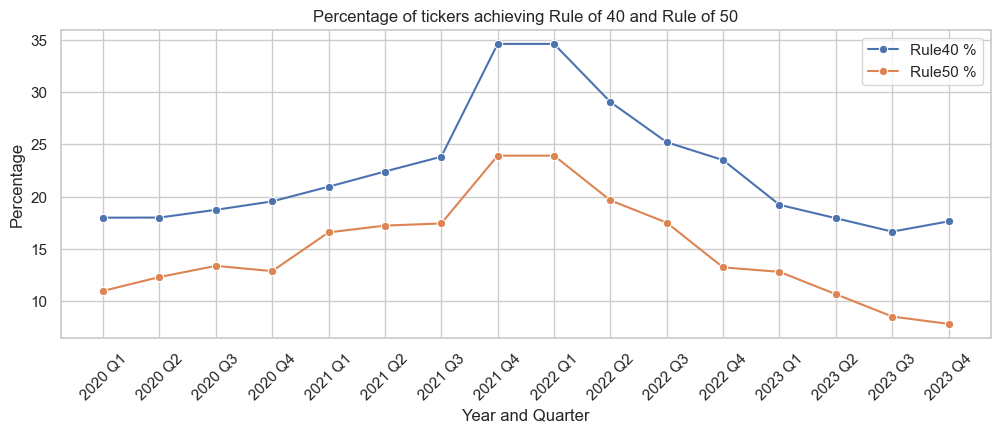

In [387]:
# Create a new column 'YearQuarter' by combining 'Year' and 'Quarter' columns
result_df['YearQuarter'] = result_df['Year'].astype(str) + ' Q' + result_df['Quarter'].astype(str)

# Create a line plot
plt.figure(figsize=(12, 4))
sns.lineplot(data=result_df, x='YearQuarter', y='Rule40 Percentage', marker='o', label='Rule40 %')
sns.lineplot(data=result_df, x='YearQuarter', y='Rule50 Percentage', marker='o', label='Rule50 %')

# Set plot labels and title
plt.xlabel('Year and Quarter')
plt.ylabel('Percentage')
plt.title('Percentage of tickers achieving Rule of 40 and Rule of 50')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Observation:** Something happened in Q4 2021 and Q1 2022 that caused a jump in both percentage of tickers achieving Rule of 40 and Rule of 50

### 2.  Charting Revenue Growth vs EBITDA Margin from lastest filing (in 2023) and Rule of 40

In [388]:
# Declare latest filing year
latest_year = 2023

# Group by 'Ticker' and calculate the sum of 'Rule40_Pass' and 'Rule50_Pass' for each group
pass_counts = focused_df.groupby('Ticker')[['Rule40_Pass', 'Rule50_Pass']].sum().reset_index()

# Rename columns for clarity
pass_counts.rename(columns={'Rule40_Pass': 'Count_Rule40_Pass', 'Rule50_Pass': 'Count_Rule50_Pass'}, inplace=True)

# Add a column to pass_counts that represents the total number of rows for each ticker
total_rows = focused_df['Ticker'].value_counts().reset_index()

# Add total_rows column to pass_counts dataframe
pass_counts = pass_counts.merge(total_rows, on=['Ticker'], how='left')

# Calculate 'Rule40_Pass Percentage'
pass_counts['Rule40_Pass Percentage'] = (pass_counts['Count_Rule40_Pass'] / pass_counts['count']) * 100

# Calculate 'Rule50_Pass Percentage'
pass_counts['Rule50_Pass Percentage'] = (pass_counts['Count_Rule50_Pass'] / pass_counts['count']) * 100


# Filter the DataFrame for the year 2023 to extract only last entry financial data
data_latest_year = focused_df[focused_df['Calendar Year'] == latest_year]

# Find the latest fiscalDateEnding for each ticker in 2023
latest_dates = data_latest_year.groupby('Ticker')['fiscalDateEnding'].max().reset_index()

# Merge the latest_dates DataFrame with data_latest_year to get the corresponding 'YoY Rev Growth + EBITDA Margin' values
latest_values_latest_year = latest_dates.merge(data_latest_year, on=['Ticker', 'fiscalDateEnding'], how='left')

# Rename columns
latest_values_latest_year.rename(columns={'fiscalDateEnding': 'Last Filing fiscalDateEnding'}, inplace=True)

# Merge the pass_counts DataFrame with the calculated averages
sum_of_achievement = pass_counts.merge(latest_values_latest_year[['Ticker', 'Last Filing fiscalDateEnding', 
                                                           'Last 4Q Revenue (mil)', 'Last 4Q EBITDA (mil)', 
                                                           'YoY Rolling 4Q Revenue Growth',
                                                           'Rolling 4Q EBITDA Margin %', 
                                                           'YoY Rev Growth + EBITDA Margin']],
                                                           on=['Ticker'], how='left')

sum_of_achievement.head()

,Ticker,Count_Rule40_Pass,Count_Rule50_Pass,count,Rule40_Pass Percentage,Rule50_Pass Percentage,Last Filing fiscalDateEnding,Last 4Q Revenue (mil),Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin
0,AAPL,7,5,15,47,33,2023-09-30,"380,282","125,820",-3,33,30
1,ABNB,8,6,15,53,40,2023-09-30,"9,639","2,309",21,24,44
2,ACCD,5,5,16,31,31,2023-11-30,678,-92,-27,-14,-41
3,ACIW,6,5,15,40,33,2023-09-30,"2,789",326,1,12,12
4,ADBE,16,12,16,100,75,2023-12-01,"19,409","7,756",10,40,50


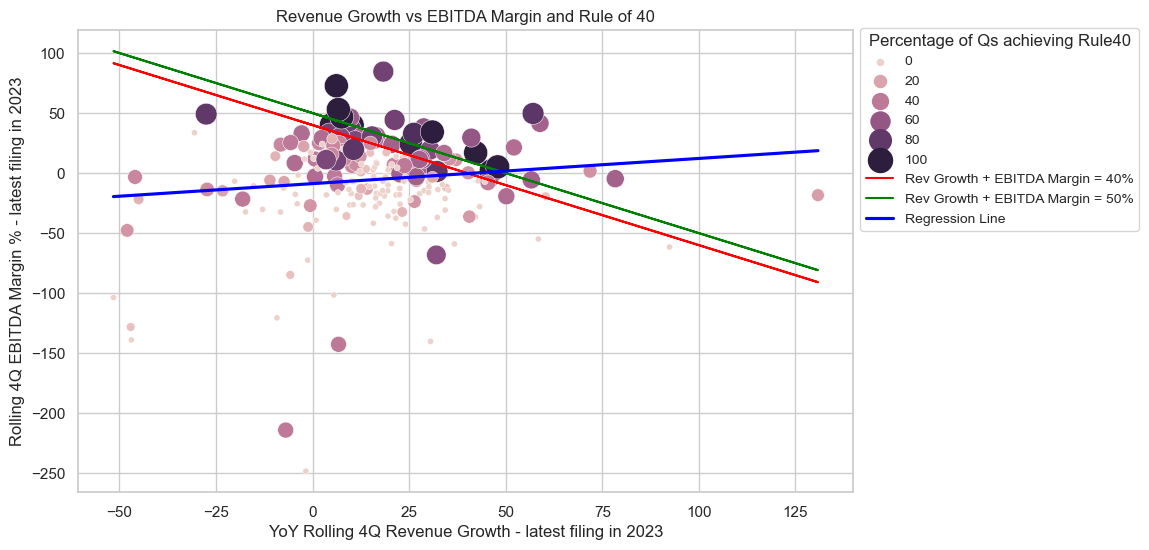

In [389]:
# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=sum_of_achievement, 
                          x="YoY Rolling 4Q Revenue Growth", y="Rolling 4Q EBITDA Margin %",
                          hue = "Rule40_Pass Percentage",
                          size = "Rule40_Pass Percentage",
                          sizes=(20, 300))

# Add the line representing x + y = 40
y_line_R40 = 40 - sum_of_achievement["YoY Rolling 4Q Revenue Growth"]
plt.plot(sum_of_achievement["YoY Rolling 4Q Revenue Growth"], y_line_R40, color='red', label='Rev Growth + EBITDA Margin = 40%')

# Add the line representing x + y = 50
y_line_R50 = 50 - sum_of_achievement["YoY Rolling 4Q Revenue Growth"]
plt.plot(sum_of_achievement["YoY Rolling 4Q Revenue Growth"], y_line_R50, color='green', label='Rev Growth + EBITDA Margin = 50%')

# Add a regression line
sns.regplot(x="YoY Rolling 4Q Revenue Growth", y="Rolling 4Q EBITDA Margin %", label='Regression Line',
            data=sum_of_achievement, scatter=False, color='blue', ci=None)


# Move the legend outside of the graph
scatter.legend(title='Percentage of Qs achieving Rule40', loc='upper left', fontsize='10', bbox_to_anchor=(1, 1.02) )

# Add labels
plt.xlabel(f'YoY Rolling 4Q Revenue Growth - latest filing in {latest_year}')
plt.ylabel(f'Rolling 4Q EBITDA Margin % - latest filing in {latest_year}')
plt.title('Revenue Growth vs EBITDA Margin and Rule of 40')

# Filter the DataFrame for rows with Rule40_Pass Percentage equal to 100%
rule40_100_df = sum_of_achievement[sum_of_achievement['Rule40_Pass Percentage'] == 100]

# Add ticker names to the data points
#for i, row in rule40_100_df.iterrows():
#    plt.annotate(row['Ticker'], (row["YoY Rolling 4Q Revenue Growth"] , row['Rolling 4Q EBITDA Margin %']))

plt.show()

In [390]:
x = sum_of_achievement["YoY Rolling 4Q Revenue Growth"]
y = sum_of_achievement["Rolling 4Q EBITDA Margin %"]

# Calculate the correlation coefficient using numpy
correlation_coefficient = np.corrcoef(x, y)[0,1]

print("Correlation coefficient between YoY Revenue Growth and EBITDA Margin % (Rolling 4Q):",
      f"{correlation_coefficient:.4f}")

Correlation coefficient between YoY Revenue Growth and EBITDA Margin % (Rolling 4Q): 0.1172


In [391]:
# Get a count of tickers meeting "Rule of 40" in their latest filing
count_meeting_condition_40 = len(sum_of_achievement[sum_of_achievement['YoY Rev Growth + EBITDA Margin'] > 40])

# Calculate the percentage of tickers meeting "Rule of 40"
percentage_meeting_condition_40 = (count_meeting_condition_40 / len(sum_of_achievement)) * 100

print(f"Percentage of tickers with 'YoY Rev Growth + EBITDA Margin' > 40%: {percentage_meeting_condition_40:.2f}%")

Percentage of tickers with 'YoY Rev Growth + EBITDA Margin' > 40%: 17.09%


In [392]:
# Get a count of tickers meeting "Rule of 50" in their latest filing
count_meeting_condition_50 = len(sum_of_achievement[sum_of_achievement['YoY Rev Growth + EBITDA Margin'] > 50])

# Calculate the percentage of tickers meeting "Rule of 50"
percentage_meeting_condition_50 = (count_meeting_condition_50 / len(sum_of_achievement)) * 100

print(f"Percentage of tickers with 'YoY Rev Growth + EBITDA Margin' > 50%: {percentage_meeting_condition_50:.2f}%")

Percentage of tickers with 'YoY Rev Growth + EBITDA Margin' > 50%: 9.40%


**Observations:**
* As the blue Regression Line shows, there is a slight positive correlation between YoY Revenue Growth and EBITDA Margin (Rolling 4Qs)

* The red line separates stocks achieving Rule of 40 in the latest filing in 2023 (those above the red line) from those not achieving such Rule. Around 17% of stocks made it to "Rule of 40" club in this chart

* The green line separates stocks achieving Rule of 50 in the latest filing in 2023 (those above the green line) from those not achieving such Rule. Around 9.4% of stocks made it to "Rule of 50" club in this chart

**Get the list of tickers achieving "Rule of 50" in all quarters of focused period 2020-2023**

In [393]:
latest_club_of_R50 = sum_of_achievement[sum_of_achievement['Rule50_Pass Percentage'] == 100]
latest_club_of_R50 = latest_club_of_R50.sort_values(by='YoY Rev Growth + EBITDA Margin', ascending=False)
latest_club_of_R50[['Ticker', 'Rule40_Pass Percentage', 'Rule50_Pass Percentage', 
                    'Last Filing fiscalDateEnding',
                    'Last 4Q Revenue (mil)', 'Last 4Q EBITDA (mil)', 
                    'YoY Rolling 4Q Revenue Growth',
                    'Rolling 4Q EBITDA Margin %', 
                    'YoY Rev Growth + EBITDA Margin']]

,Ticker,Rule40_Pass Percentage,Rule50_Pass Percentage,Last Filing fiscalDateEnding,Last 4Q Revenue (mil),Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin
219,VRSN,100,100,2023-09-30,"1,482","1,078",6,73,79
192,STNE,100,100,2023-09-30,"10,972","3,756",31,34,65
126,NFLX,100,100,2023-12-31,"33,723","17,863",7,53,60
120,MSFT,100,100,2023-09-30,"216,125","101,039",8,47,54


**Observations**
- Varonis Systems (VRSN), StoneCo (STNE), Netflix (NFLX), Microsoft (MSFT) are 4 stickers achieving Rule of 50 for all quarters in period 2020-2023

**Get the list of tickers achieving "Rule of 40" in all quarters of focused period 2020-2023**

In [394]:
latest_club_of_R40 = sum_of_achievement[sum_of_achievement['Rule40_Pass Percentage'] == 100]
latest_club_of_R40 = latest_club_of_R40.sort_values(by='YoY Rev Growth + EBITDA Margin', ascending=False)
latest_club_of_R40[['Ticker', 'Rule40_Pass Percentage', 'Rule50_Pass Percentage', 
                    'Last Filing fiscalDateEnding',
                    'Last 4Q Revenue (mil)', 'Last 4Q EBITDA (mil)', 
                    'YoY Rolling 4Q Revenue Growth',
                    'Rolling 4Q EBITDA Margin %', 
                    'YoY Rev Growth + EBITDA Margin']]

,Ticker,Rule40_Pass Percentage,Rule50_Pass Percentage,Last Filing fiscalDateEnding,Last 4Q Revenue (mil),Last 4Q EBITDA (mil),YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,YoY Rev Growth + EBITDA Margin
219,VRSN,100,100,2023-09-30,"1,482","1,078",6,73,79
192,STNE,100,100,2023-09-30,"10,972","3,756",31,34,65
126,NFLX,100,100,2023-12-31,"33,723","17,863",7,53,60
116,MELI,100,93,2023-09-30,"12,705","2,155",42,17,59
120,MSFT,100,100,2023-09-30,"216,125","101,039",8,47,54
150,PGNY,100,87,2023-09-30,"1,036",54,48,5,53
4,ADBE,100,75,2023-12-01,"19,409","7,756",10,40,50
47,CRWD,100,88,2023-10-31,"2,967",55,46,2,48
41,CHKP,100,7,2023-09-30,"2,462",992,5,40,45


### 3. Among tickers achieving Rule of 40, what's the contribution of Revenue Growth vs EBITDA Margin?

In [395]:
# Calculate 'Rev Growth contribution to Success metrics' and handle division by zero
focused_df['Rev Growth contribution to Success metrics'] = np.where(
    focused_df['YoY Rev Growth + EBITDA Margin'] != 0,
    focused_df['YoY Rolling 4Q Revenue Growth'] / focused_df['YoY Rev Growth + EBITDA Margin'] * 100,
    0)

# Calculate 'EBITDA Margin contribution to Success metrics' and handle division by zero
focused_df['EBITDA Margin contribution to Success metrics'] = np.where(
    focused_df['YoY Rev Growth + EBITDA Margin'] != 0,
    focused_df['Rolling 4Q EBITDA Margin %'] / focused_df['YoY Rev Growth + EBITDA Margin'] * 100,
    0)

# Calculate Log of Last 4Q Revenue 
focused_df['Log Last 4Q Revenue'] = np.log(focused_df['Last 4Q Revenue (mil)'])

In [396]:
Rule40_df = focused_df[focused_df['Rule40_Pass'] == True]

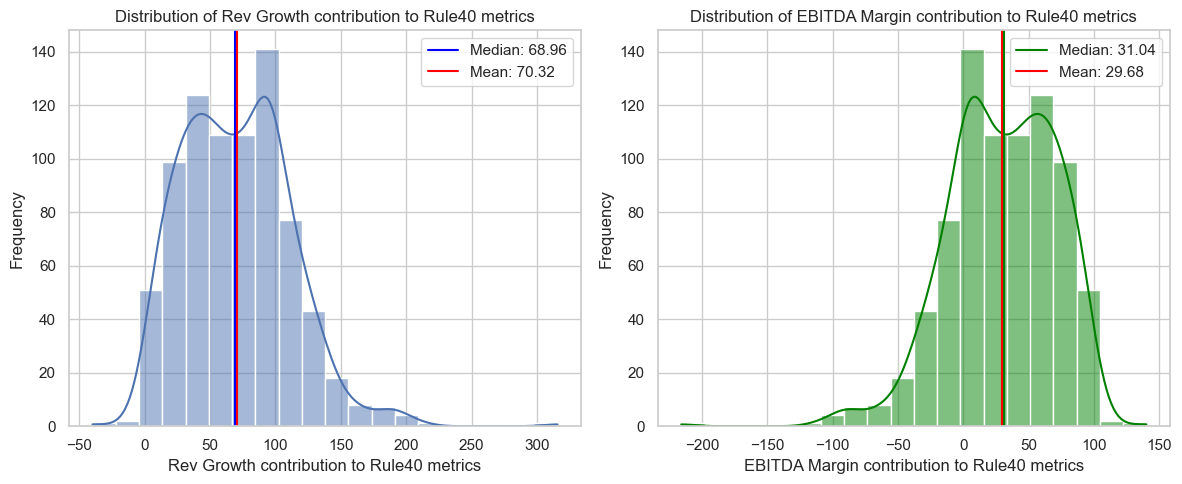

In [397]:
# Create a figure
plt.figure(figsize=(12, 5))

# Plot for 'Rev Growth contribution to Success metrics'
plt.subplot(1, 2, 1)
sns.histplot(data=Rule40_df, x='Rev Growth contribution to Success metrics', bins=20, kde=True)
median_rev_growth = Rule40_df['Rev Growth contribution to Success metrics'].median()
mean_rev_growth = Rule40_df['Rev Growth contribution to Success metrics'].mean()

plt.axvline(median_rev_growth, color='blue', label=f'Median: {median_rev_growth:.2f}')
plt.axvline(mean_rev_growth, color='red', label=f'Mean: {mean_rev_growth:.2f}')
plt.legend()
plt.title('Distribution of Rev Growth contribution to Rule40 metrics')
plt.xlabel('Rev Growth contribution to Rule40 metrics')
plt.ylabel('Frequency')

# Plot for 'EBITDA Margin contribution to Success metrics'
plt.subplot(1, 2, 2)
sns.histplot(data=Rule40_df, x='EBITDA Margin contribution to Success metrics', bins=20, kde=True, color='green')
median_ebitda_margin = Rule40_df['EBITDA Margin contribution to Success metrics'].median()
mean_ebitda_margin = Rule40_df['EBITDA Margin contribution to Success metrics'].mean()

plt.axvline(median_ebitda_margin, color='green', label=f'Median: {median_ebitda_margin:.2f}')
plt.axvline(mean_ebitda_margin, color='red', label=f'Mean: {mean_ebitda_margin:.2f}')
plt.legend()
plt.title('Distribution of EBITDA Margin contribution to Rule40 metrics')
plt.xlabel('EBITDA Margin contribution to Rule40 metrics')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Observation:** In general, Revenue Growth contributes 2x more to Rule of 40 achievement than EBITDA Margin, indicating that the list of firms in consideration contains a lot of early stage hyper growth firms


**Let's look at a scatterplot of Revenue (mil) vs Contribution of Rev Growth to Rule40 achievement to validate this**

In [398]:
# Calculate the top 1% and bottom 1% quantiles
top_quantile = focused_df['YoY Rev Growth + EBITDA Margin'].quantile(0.99)
bottom_quantile = focused_df['YoY Rev Growth + EBITDA Margin'].quantile(0.01)

# Exclude top and bottom values from this analysis
no_outlier_df = focused_df[(focused_df['YoY Rev Growth + EBITDA Margin'] < top_quantile ) &
                           (focused_df['YoY Rev Growth + EBITDA Margin'] > bottom_quantile)]

# Rule40_no_ouliers
Rule40_no_ouliers = no_outlier_df[no_outlier_df['Rule40_Pass'] == True]

In [399]:
# Get a table for summary of statistics
Rule40_contribution_stats = Rule40_no_ouliers[['YoY Rolling 4Q Revenue Growth', 'Rolling 4Q EBITDA Margin %',
                                               'Rev Growth contribution to Success metrics',
                                               'EBITDA Margin contribution to Success metrics' ]].describe()

# Display the statistical summary
display(Rule40_contribution_stats)

,YoY Rolling 4Q Revenue Growth,Rolling 4Q EBITDA Margin %,Rev Growth contribution to Success metrics,EBITDA Margin contribution to Success metrics
count,766,766,766,766
mean,49,19,69,31
std,39,27,41,41
min,-18,-88,-40,-216
25%,19,3,36,4
50%,38,21,67,33
75%,67,35,96,64
max,231,173,316,140


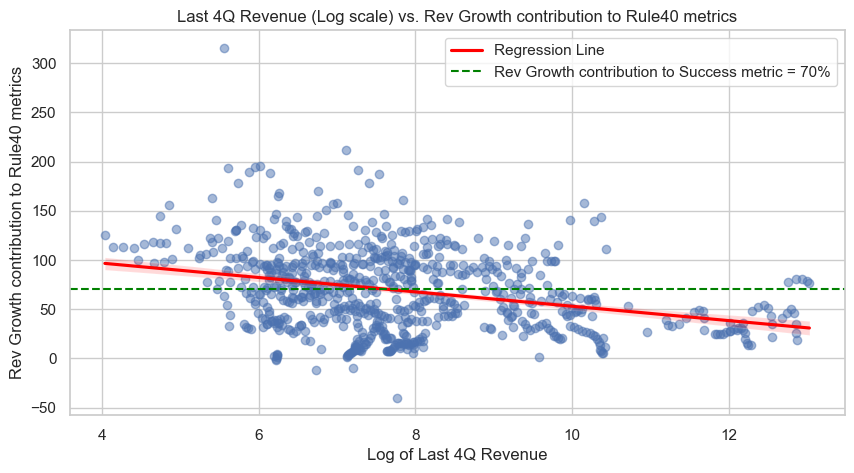

In [400]:
# Scatterplot
plt.figure(figsize=(10, 5))
plt.scatter(Rule40_no_ouliers['Log Last 4Q Revenue'], Rule40_no_ouliers['Rev Growth contribution to Success metrics'], 
            alpha=0.5)
sns.regplot(x='Log Last 4Q Revenue', y='Rev Growth contribution to Success metrics', 
            data=Rule40_no_ouliers, scatter=False, color='red', label='Regression Line')

plt.axhline(y=70, color='green', linestyle='--', label='Rev Growth contribution to Success metric = 70%')

plt.title('Last 4Q Revenue (Log scale) vs. Rev Growth contribution to Rule40 metrics')
plt.xlabel('Log of Last 4Q Revenue')
plt.ylabel('Rev Growth contribution to Rule40 metrics')
plt.grid(True)
plt.legend()
plt.show()

**Observation:** The slope of the regresion line confirms my prior guess that in lower-revenue firms, Revenue Growth contributes significantly more to Rule of 40 achievement than EBITDA Margin

### 4. Among tickers achieving Rule of 50, what's the contribution of Revenue Growth vs EBITDA Margin?

In [401]:
Rule50_df = focused_df[focused_df['Rule50_Pass'] == True]

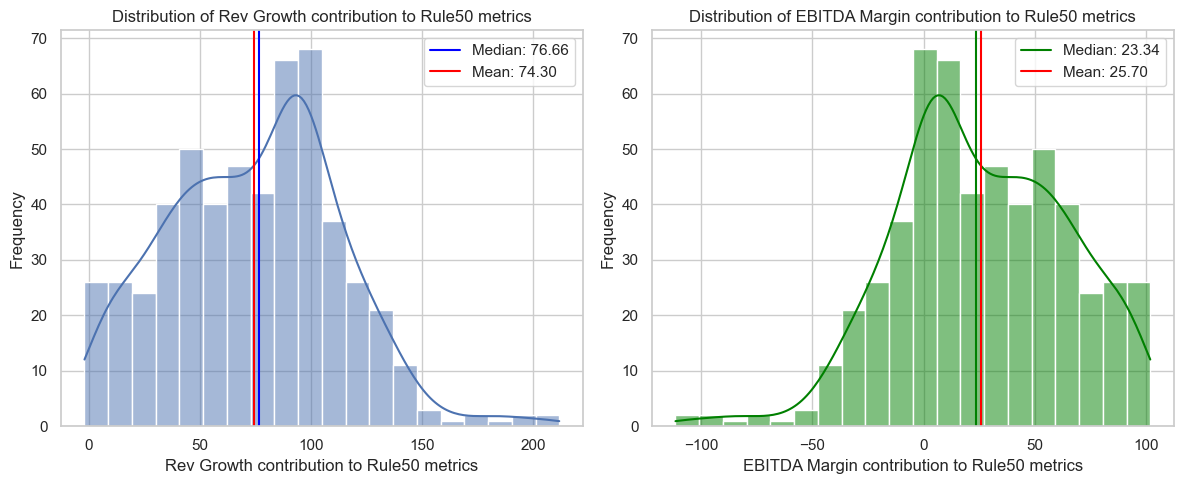

In [402]:
# Create a figure
plt.figure(figsize=(12, 5))

# Plot for 'Rev Growth contribution to Success metrics'
plt.subplot(1, 2, 1)
sns.histplot(data=Rule50_df, x='Rev Growth contribution to Success metrics', bins=20, kde=True)
median_rev_growth = Rule50_df['Rev Growth contribution to Success metrics'].median()
mean_rev_growth = Rule50_df['Rev Growth contribution to Success metrics'].mean()

plt.axvline(median_rev_growth, color='blue', label=f'Median: {median_rev_growth:.2f}')
plt.axvline(mean_rev_growth, color='red', label=f'Mean: {mean_rev_growth:.2f}')
plt.legend()
plt.title('Distribution of Rev Growth contribution to Rule50 metrics')
plt.xlabel('Rev Growth contribution to Rule50 metrics')
plt.ylabel('Frequency')

# Plot for 'EBITDA Margin contribution to Success metrics'
plt.subplot(1, 2, 2)
sns.histplot(data=Rule50_df, x='EBITDA Margin contribution to Success metrics', bins=20, kde=True, color='green')
median_ebitda_margin = Rule50_df['EBITDA Margin contribution to Success metrics'].median()
mean_ebitda_margin = Rule50_df['EBITDA Margin contribution to Success metrics'].mean()

plt.axvline(median_ebitda_margin, color='green', label=f'Median: {median_ebitda_margin:.2f}')
plt.axvline(mean_ebitda_margin, color='red', label=f'Mean: {mean_ebitda_margin:.2f}')
plt.legend()
plt.title('Distribution of EBITDA Margin contribution to Rule50 metrics')
plt.xlabel('EBITDA Margin contribution to Rule50 metrics')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Observation:** If we only focus on tickers achieving Rule of 50, the contribution of Revenue Growth is even larger, averaging at 74% compared to 70% in the case of Rule of 40

### 5. List of tickers rely exclusively on Revenue Growth to achieve Rule of 40 in 2022-2023

In [403]:
R40_RevGrowth_df = focused_df[(focused_df['Rule40_Pass'] == True) & 
                              (focused_df['Calendar Year'] >= 2022) &
                              (focused_df['Rev Growth contribution to Success metrics'] > 100)]

In [404]:
display(R40_RevGrowth_df['Ticker'].unique())

array(['ACCD', 'AYX', 'BILL', 'BLND', 'LAW', 'CRWD', 'DDOG', 'DM', 'DCBO',
       'EB', 'FLYW', 'GRAB', 'HIMS', 'HUBS', 'CART', 'LSPD', 'LYFT',
       'MNDY', 'OPEN', 'OSCR', 'PGY', 'RBLX', 'SEMR', 'SE', 'SNAP',
       'SNOW', 'SOFI', 'TOST', 'UBER', 'U', 'NCNO'], dtype=object)

### 6. List of tickers rely exclusively on EBITDA Margin to achieve Rule of 40 in 2022-2023

In [405]:
R40_EBITDA_Margin_df = focused_df[(focused_df['Rule40_Pass'] == True) & 
                              (focused_df['Calendar Year'] >= 2022) &
                              (focused_df['EBITDA Margin contribution to Success metrics'] > 100)]

In [406]:
display(R40_EBITDA_Margin_df['Ticker'].unique())

array(['FICO', 'MSTR', 'VRSK'], dtype=object)

In [407]:
#focused_df[focused_df['Ticker'] == 'FICO']